DSBDAL 06

Roll : 13320

In [179]:
import pandas as pd
import seaborn as sns

In [180]:
df=pd.read_excel('titanic.xlsx')
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [181]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [182]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [183]:
df['Sex']=df['Sex'].map({'male':1,'female':0})

In [184]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0
...,...,...,...,...,...
886,2,1,27.0,13.0000,0
887,1,0,19.0,30.0000,1
888,3,0,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [185]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [186]:
df['Age']=df['Age'].fillna(df.Age.mean())
df

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.000000,7.2500,0
1,1,0,38.000000,71.2833,1
2,3,0,26.000000,7.9250,1
3,1,0,35.000000,53.1000,1
4,3,1,35.000000,8.0500,0
...,...,...,...,...,...
886,2,1,27.000000,13.0000,0
887,1,0,19.000000,30.0000,1
888,3,0,29.699118,23.4500,0
889,1,1,26.000000,30.0000,1


In [187]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [188]:
target=df['Survived']

In [189]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [190]:
input=df.drop(['Survived'],axis=1)

In [191]:
input

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [192]:
from sklearn.model_selection import train_test_split

In [193]:
xtrain,xtest,ytrain,ytest=train_test_split(input,target,test_size=0.2)

In [194]:
ytrain

50     0
775    0
614    0
709    1
844    0
      ..
215    1
695    0
783    0
828    1
278    0
Name: Survived, Length: 712, dtype: int64

In [195]:
from sklearn.naive_bayes import GaussianNB

In [196]:
model=GaussianNB()

In [197]:
model.fit(xtrain,ytrain)

GaussianNB()

In [198]:
model.score(xtest,ytest)

0.7877094972067039

In [199]:
ypred=model.predict(xtest)

In [200]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[85, 20],
       [18, 56]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

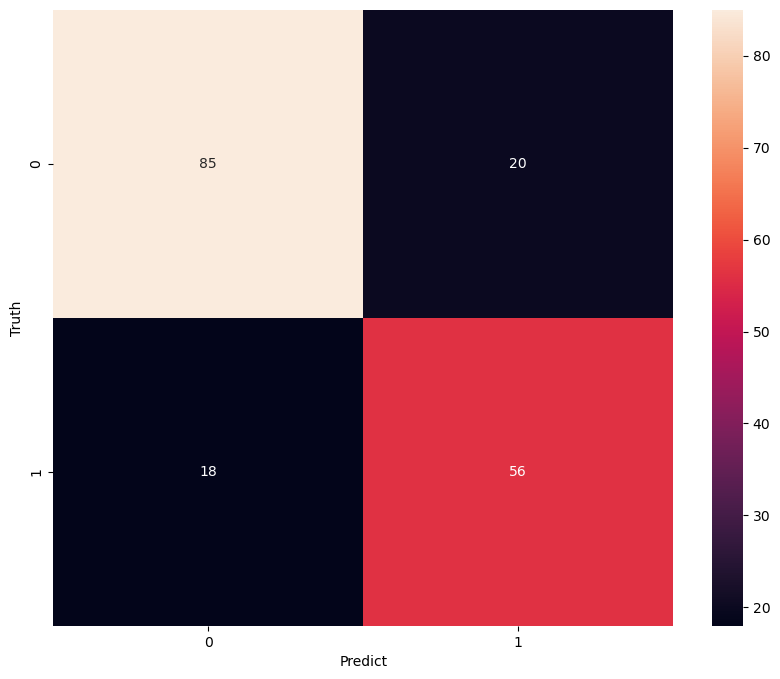

In [204]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')